In [ ]:
# UJJWAL CHOWDHURY

## Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
# Needed for plotting
import matplotlib.colors
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
# Needed for generating training and testing datasets
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import r2_score


## Setting up working directory

In [2]:
%cd C:/Users/Ujjwa/OneDrive/Desktop/BDA/Semester 2/CDS/CDS Assignment/Assignment 3

C:\Users\Ujjwa\OneDrive\Desktop\BDA\Semester 2\CDS\CDS Assignment\Assignment 3


## Reading the excel file

In [2]:
data = pd.read_csv('PRSA_data_2010.1.1-2014.12.31train.csv')

## Some info about the file

In [3]:
print('Dimension of the data = ',data.shape)

Dimension of the data =  (1460, 81)


### Selecting the numerical type columns

In [4]:
data1=data.select_dtypes(include=np.number)

### Counting Null values per column

In [5]:
data1.isna().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

### Removing NA Values

In [6]:
df =data1.dropna()
#d.isna().sum()#d.isna().sum()

## Create correlation matrix and the heatmap 

Text(0.5, 1.0, 'Correlations')

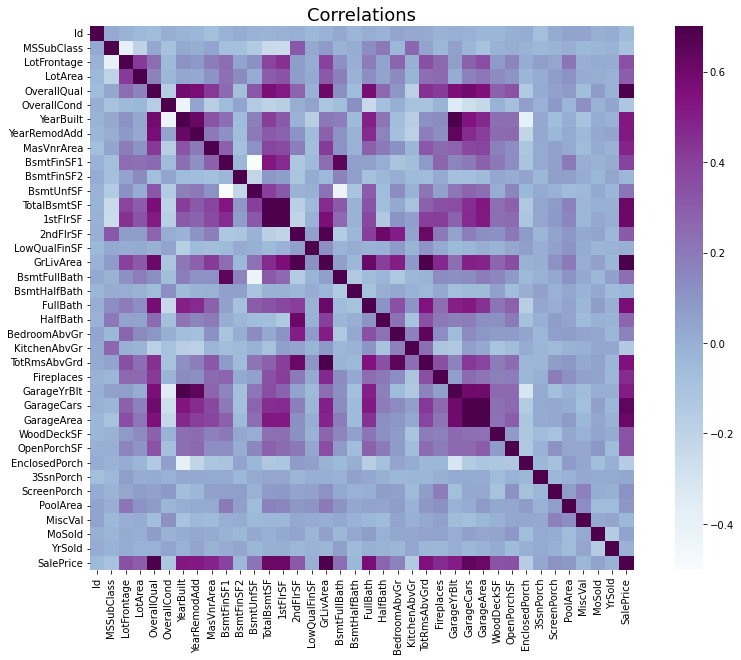

In [7]:
corr = df.corr()
plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr, cmap="BuPu", vmax=0.7, square=True)
ax.set_title("Correlations", fontsize = 18)

#### Observations:
 The Columns which are highly corelated are:  
               'GarageCars',
                'GarageArea',
                'GrLivArea',
                'OverallQual',
                'TotRmsAbvGrd',
                '1stFlrSF',
                'FullBath',
                'WoodDeckSF',
                'OpenPorchSF'

## Converting the dataframe into two numpy arrays

In [48]:
X = np.array(df[['GarageCars',
                'GarageArea',
                'GrLivArea',
                'OverallQual',
                'TotRmsAbvGrd',
                '1stFlrSF',
                'FullBath',
                'WoodDeckSF',
                'OpenPorchSF']])

y = np.array(df['SalePrice'])

## Spiliting the data into train set and test set

In [33]:
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

# Ordinary Least Squares

In [34]:
%matplotlib inline

In [35]:
res = sm.OLS(y_train, X_train).fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.955
Model:                            OLS   Adj. R-squared (uncentered):              0.954
Method:                 Least Squares   F-statistic:                              1808.
Date:                Thu, 17 Mar 2022   Prob (F-statistic):                        0.00
Time:                        15:12:12   Log-Likelihood:                         -9479.8
No. Observations:                 784   AIC:                                  1.898e+04
Df Residuals:                     775   BIC:                                  1.902e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [36]:
print("Analytically computing the parameters:")
print(np.linalg.inv(X_train.T@X_train)@X_train.T@y_train)

Analytically computing the parameters:
[ 13103.05471846     37.3806279      84.43895943  15531.62144858
 -15168.96638951     19.75303527  -8185.14173635     58.47099045
     67.02944299]


In [37]:
print("Parameters: ", res.params)
print("Standard errors: ", res.bse)
print("R_squared value: ", res.rsquared)
print("Testing Accuracy:{}".format(r2_score(res.predict(X_test), y_test)))

Parameters:  [ 13103.05471846     37.3806279      84.43895943  15531.62144858
 -15168.96638951     19.75303527  -8185.14173635     58.47099045
     67.02944299]
Standard errors:  [4781.28224247   15.70226985    5.98785396 1392.13425045 1454.40694091
    5.27140896 3920.94964838   13.43176243   25.66600311]
R_squared value:  0.9545268564339221
Testing Accuracy:0.34741359498110025


## Gradient Descent

In [38]:
import numpy as np
import matplotlib.pyplot as plt

class Regressor():
    def __init__(self, learning_rate=0.01, tol=0.01, seed=None,normalize=False):
        self.W = None
        self.b = None
        self.__lr = learning_rate
        self.__tol = tol
        self.__length = None
        self.__normalize = normalize
        self.__m = None
        self.__costs = []
        self.__iterations = []
        self.__ws = []
        self.__bs = []
        np.random.seed(seed if seed is not None else np.random.randint(100))

    def __initialize_weights_and_bias(self):
        self.W = np.random.randn(self.__length) #(n,1)
        self.b = 0
        self.__ws.append(self.W)
        self.__bs.append(self.b)

    def __computeCost(self,h,Y):
        loss = np.square(h-Y)
        cost = np.sum(loss)/(2*self.__m)
        return cost

    def __optimize(self,X,Y):
        h = np.dot(X,self.W)+self.b
        dW = np.dot( X.T, (h-Y) ) / self.__m
        db = np.sum( h-Y )  / self.__m
        self.W = self.W - self.__lr*dW
        self.b = self.b - self.__lr*db

    def __normalizeX(self,X):return (X-self.__mean) / (self.__std)

    def fit(self, X, y, verbose=True):
        if self.__normalize:
            self.__mean, self.__std = X.mean(axis=0), X.std(axis=0)
            X = self.__normalizeX(X)
        self.__m,self.__length = X.shape
        self.__initialize_weights_and_bias()
        last_cost,i = float('inf'),0
        while True:
            h = np.dot(X,self.W)+self.b
            cost = self.__computeCost(h,y)
            if verbose: print(f"Iteration: {i}, Cost: {cost:.3f}")
            self.__optimize(X,y)
            if last_cost-cost < self.__tol: break
            else: last_cost,i = cost,i+1
            self.__costs.append(cost)
            self.__iterations.append(i)

    def predict(self,X):

        if self.__normalize: X = self.__normalizeX(X)
        return np.dot(X,self.W)+self.b
    
    def seq_fit(self, X, y, verbose=True):
        if self.__normalize:
            self.__mean, self.__std = X.mean(axis=0), X.std(axis=0)
            X = self.__normalizeX(X)
        self.__m,self.__length = X.shape
        self.__initialize_weights_and_bias()
        last_cost,j = float('inf'),0
        while True:
            cost=0
            for i in range(len(X)):
                h = np.dot(X[i],self.W)+self.b
                cost += self.__computeCost(h,y[i])
                self.__optimize(X[i],y[i])

            if verbose: print(f"Iteration: {j}, Cost: {cost:.3f}")
            if last_cost-cost < self.__tol: break
            else: last_cost,j = cost,j+1
            self.__costs.append(cost)
            self.__iterations.append(j)     

    def plot(self,figsize=(7,5)):
        plt.figure(figsize=figsize)
        plt.plot(self.__iterations,self.__costs)
        plt.xlabel('Iterations')
        plt.ylabel('Cost')
        plt.title("Iterations vs Cost")
        plt.show()

    def score(self,X,y):
        return 1-(np.sum(((y-self.predict(X))**2))/np.sum((y-np.mean(y))**2))
  

### Batch Gradient Descent

X_train:(784, 9)
y_train:(784,)
Iteration: 0, Cost: 20481902151.144
Iteration: 1, Cost: 19935457808.076
Iteration: 2, Cost: 19413433997.104
Iteration: 3, Cost: 18914164772.363
Iteration: 4, Cost: 18436119987.514
Iteration: 5, Cost: 17977893665.206
Iteration: 6, Cost: 17538193374.538
Iteration: 7, Cost: 17115830528.900
Iteration: 8, Cost: 16709711524.236
Iteration: 9, Cost: 16318829644.678
Iteration: 10, Cost: 15942257668.892
Iteration: 11, Cost: 15579141116.244
Iteration: 12, Cost: 15228692077.207
Iteration: 13, Cost: 14890183577.260
Iteration: 14, Cost: 14562944427.926
Iteration: 15, Cost: 14246354522.656
Iteration: 16, Cost: 13939840538.918
Iteration: 17, Cost: 13642872011.223
Iteration: 18, Cost: 13354957742.875
Iteration: 19, Cost: 13075642527.055
Iteration: 20, Cost: 12804504150.370
Iteration: 21, Cost: 12541150654.369
Iteration: 22, Cost: 12285217832.633
Iteration: 23, Cost: 12036366943.005
Iteration: 24, Cost: 11794282616.295
Iteration: 25, Cost: 11558670944.426
Iteration: 26, C

Iteration: 1087, Cost: 726443700.065
Iteration: 1088, Cost: 726441315.308
Iteration: 1089, Cost: 726438938.535
Iteration: 1090, Cost: 726436569.715
Iteration: 1091, Cost: 726434208.815
Iteration: 1092, Cost: 726431855.803
Iteration: 1093, Cost: 726429510.647
Iteration: 1094, Cost: 726427173.318
Iteration: 1095, Cost: 726424843.782
Iteration: 1096, Cost: 726422522.009
Iteration: 1097, Cost: 726420207.968
Iteration: 1098, Cost: 726417901.628
Iteration: 1099, Cost: 726415602.958
Iteration: 1100, Cost: 726413311.928
Iteration: 1101, Cost: 726411028.508
Iteration: 1102, Cost: 726408752.667
Iteration: 1103, Cost: 726406484.376
Iteration: 1104, Cost: 726404223.604
Iteration: 1105, Cost: 726401970.321
Iteration: 1106, Cost: 726399724.499
Iteration: 1107, Cost: 726397486.107
Iteration: 1108, Cost: 726395255.116
Iteration: 1109, Cost: 726393031.498
Iteration: 1110, Cost: 726390815.222
Iteration: 1111, Cost: 726388606.261
Iteration: 1112, Cost: 726386404.586
Iteration: 1113, Cost: 726384210.168
I

Iteration: 2021, Cost: 725710650.092
Iteration: 2022, Cost: 725710497.633
Iteration: 2023, Cost: 725710345.603
Iteration: 2024, Cost: 725710193.999
Iteration: 2025, Cost: 725710042.822
Iteration: 2026, Cost: 725709892.069
Iteration: 2027, Cost: 725709741.740
Iteration: 2028, Cost: 725709591.833
Iteration: 2029, Cost: 725709442.348
Iteration: 2030, Cost: 725709293.283
Iteration: 2031, Cost: 725709144.636
Iteration: 2032, Cost: 725708996.407
Iteration: 2033, Cost: 725708848.595
Iteration: 2034, Cost: 725708701.197
Iteration: 2035, Cost: 725708554.214
Iteration: 2036, Cost: 725708407.644
Iteration: 2037, Cost: 725708261.485
Iteration: 2038, Cost: 725708115.737
Iteration: 2039, Cost: 725707970.399
Iteration: 2040, Cost: 725707825.469
Iteration: 2041, Cost: 725707680.946
Iteration: 2042, Cost: 725707536.828
Iteration: 2043, Cost: 725707393.116
Iteration: 2044, Cost: 725707249.807
Iteration: 2045, Cost: 725707106.901
Iteration: 2046, Cost: 725706964.396
Iteration: 2047, Cost: 725706822.292
I

Iteration: 3082, Cost: 725658926.364
Iteration: 3083, Cost: 725658918.454
Iteration: 3084, Cost: 725658910.565
Iteration: 3085, Cost: 725658902.699
Iteration: 3086, Cost: 725658894.854
Iteration: 3087, Cost: 725658887.031
Iteration: 3088, Cost: 725658879.230
Iteration: 3089, Cost: 725658871.450
Iteration: 3090, Cost: 725658863.692
Iteration: 3091, Cost: 725658855.955
Iteration: 3092, Cost: 725658848.240
Iteration: 3093, Cost: 725658840.546
Iteration: 3094, Cost: 725658832.873
Iteration: 3095, Cost: 725658825.221
Iteration: 3096, Cost: 725658817.591
Iteration: 3097, Cost: 725658809.982
Iteration: 3098, Cost: 725658802.393
Iteration: 3099, Cost: 725658794.826
Iteration: 3100, Cost: 725658787.279
Iteration: 3101, Cost: 725658779.754
Iteration: 3102, Cost: 725658772.249
Iteration: 3103, Cost: 725658764.765
Iteration: 3104, Cost: 725658757.302
Iteration: 3105, Cost: 725658749.859
Iteration: 3106, Cost: 725658742.437
Iteration: 3107, Cost: 725658735.035
Iteration: 3108, Cost: 725658727.654
I

Iteration: 4057, Cost: 725656251.577
Iteration: 4058, Cost: 725656251.038
Iteration: 4059, Cost: 725656250.499
Iteration: 4060, Cost: 725656249.962
Iteration: 4061, Cost: 725656249.427
Iteration: 4062, Cost: 725656248.893
Iteration: 4063, Cost: 725656248.360
Iteration: 4064, Cost: 725656247.829
Iteration: 4065, Cost: 725656247.300
Iteration: 4066, Cost: 725656246.772
Iteration: 4067, Cost: 725656246.245
Iteration: 4068, Cost: 725656245.720
Iteration: 4069, Cost: 725656245.196
Iteration: 4070, Cost: 725656244.673
Iteration: 4071, Cost: 725656244.152
Iteration: 4072, Cost: 725656243.633
Iteration: 4073, Cost: 725656243.115
Iteration: 4074, Cost: 725656242.598
Iteration: 4075, Cost: 725656242.083
Iteration: 4076, Cost: 725656241.569
Iteration: 4077, Cost: 725656241.057
Iteration: 4078, Cost: 725656240.545
Iteration: 4079, Cost: 725656240.036
Iteration: 4080, Cost: 725656239.528
Iteration: 4081, Cost: 725656239.021
Iteration: 4082, Cost: 725656238.515
Iteration: 4083, Cost: 725656238.011
I

Iteration: 5154, Cost: 725656063.677
Iteration: 5155, Cost: 725656063.650
Iteration: 5156, Cost: 725656063.623
Iteration: 5157, Cost: 725656063.596
Iteration: 5158, Cost: 725656063.570
Iteration: 5159, Cost: 725656063.543
Iteration: 5160, Cost: 725656063.516
Iteration: 5161, Cost: 725656063.489
Iteration: 5162, Cost: 725656063.463
Iteration: 5163, Cost: 725656063.436
Iteration: 5164, Cost: 725656063.410
Iteration: 5165, Cost: 725656063.383
Iteration: 5166, Cost: 725656063.357
Iteration: 5167, Cost: 725656063.331
Iteration: 5168, Cost: 725656063.305
Iteration: 5169, Cost: 725656063.279
Iteration: 5170, Cost: 725656063.253
Iteration: 5171, Cost: 725656063.227
Iteration: 5172, Cost: 725656063.201
Iteration: 5173, Cost: 725656063.175
Iteration: 5174, Cost: 725656063.149
Iteration: 5175, Cost: 725656063.124
Iteration: 5176, Cost: 725656063.098
Iteration: 5177, Cost: 725656063.073
Iteration: 5178, Cost: 725656063.047
Iteration: 5179, Cost: 725656063.022
Iteration: 5180, Cost: 725656062.996
I

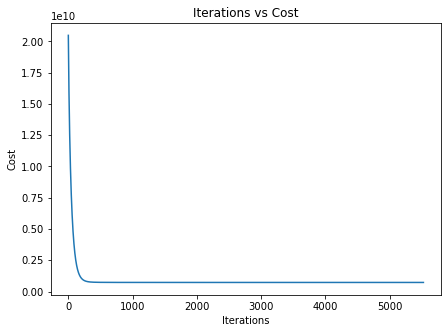

In [39]:
print(f"X_train:{X_train.shape}\ny_train:{y_train.shape}")

batch_regressor = Regressor(normalize=True)
batch_regressor.fit(X_train,y_train)

train_score = r2_score(batch_regressor.predict(X_train),y_train)
test_score = r2_score(batch_regressor.predict(X_test),y_test)

print("Train Score:", train_score)
print("Test Score: ",test_score)
batch_regressor.plot()

### Sequential Gradient Descent

X_train:(784, 9)
y_train:(784,)
Iteration: 0, Cost: 20213406653.220
Iteration: 1, Cost: 19684626841.302
Iteration: 2, Cost: 19178687638.094
Iteration: 3, Cost: 18694082036.192
Iteration: 4, Cost: 18229422670.401
Iteration: 5, Cost: 17783431804.100
Iteration: 6, Cost: 17354932164.640
Iteration: 7, Cost: 16942838555.556
Iteration: 8, Cost: 16546150179.550
Iteration: 9, Cost: 16163943611.786
Iteration: 10, Cost: 15795366368.215
Iteration: 11, Cost: 15439631018.341
Iteration: 12, Cost: 15096009796.126
Iteration: 13, Cost: 14763829666.718
Iteration: 14, Cost: 14442467810.227
Iteration: 15, Cost: 14131347487.130
Iteration: 16, Cost: 13829934252.862
Iteration: 17, Cost: 13537732491.924
Iteration: 18, Cost: 13254282244.364
Iteration: 19, Cost: 12979156299.807
Iteration: 20, Cost: 12711957536.282
Iteration: 21, Cost: 12452316483.095
Iteration: 22, Cost: 12199889088.691
Iteration: 23, Cost: 11954354676.131
Iteration: 24, Cost: 11715414070.243
Iteration: 25, Cost: 11482787881.891
Iteration: 26, C

Iteration: 223, Cost: 962429068.236
Iteration: 224, Cost: 958245057.456
Iteration: 225, Cost: 954140590.177
Iteration: 226, Cost: 950114117.072
Iteration: 227, Cost: 946164119.272
Iteration: 228, Cost: 942289107.768
Iteration: 229, Cost: 938487622.815
Iteration: 230, Cost: 934758233.361
Iteration: 231, Cost: 931099536.478
Iteration: 232, Cost: 927510156.807
Iteration: 233, Cost: 923988746.014
Iteration: 234, Cost: 920533982.258
Iteration: 235, Cost: 917144569.666
Iteration: 236, Cost: 913819237.824
Iteration: 237, Cost: 910556741.271
Iteration: 238, Cost: 907355859.010
Iteration: 239, Cost: 904215394.022
Iteration: 240, Cost: 901134172.796
Iteration: 241, Cost: 898111044.864
Iteration: 242, Cost: 895144882.348
Iteration: 243, Cost: 892234579.510
Iteration: 244, Cost: 889379052.322
Iteration: 245, Cost: 886577238.030
Iteration: 246, Cost: 883828094.743
Iteration: 247, Cost: 881130601.014
Iteration: 248, Cost: 878483755.442
Iteration: 249, Cost: 875886576.273
Iteration: 250, Cost: 873338

Iteration: 458, Cost: 736692995.802
Iteration: 459, Cost: 736609262.025
Iteration: 460, Cost: 736526557.026
Iteration: 461, Cost: 736444864.356
Iteration: 462, Cost: 736364167.864
Iteration: 463, Cost: 736284451.689
Iteration: 464, Cost: 736205700.257
Iteration: 465, Cost: 736127898.273
Iteration: 466, Cost: 736051030.718
Iteration: 467, Cost: 735975082.842
Iteration: 468, Cost: 735900040.160
Iteration: 469, Cost: 735825888.446
Iteration: 470, Cost: 735752613.729
Iteration: 471, Cost: 735680202.289
Iteration: 472, Cost: 735608640.649
Iteration: 473, Cost: 735537915.573
Iteration: 474, Cost: 735468014.062
Iteration: 475, Cost: 735398923.347
Iteration: 476, Cost: 735330630.888
Iteration: 477, Cost: 735263124.365
Iteration: 478, Cost: 735196391.679
Iteration: 479, Cost: 735130420.945
Iteration: 480, Cost: 735065200.487
Iteration: 481, Cost: 735000718.837
Iteration: 482, Cost: 734936964.729
Iteration: 483, Cost: 734873927.095
Iteration: 484, Cost: 734811595.064
Iteration: 485, Cost: 734749

Iteration: 690, Cost: 729020170.322
Iteration: 691, Cost: 729007717.599
Iteration: 692, Cost: 728995333.689
Iteration: 693, Cost: 728983018.058
Iteration: 694, Cost: 728970770.179
Iteration: 695, Cost: 728958589.531
Iteration: 696, Cost: 728946475.598
Iteration: 697, Cost: 728934427.870
Iteration: 698, Cost: 728922445.840
Iteration: 699, Cost: 728910529.009
Iteration: 700, Cost: 728898676.882
Iteration: 701, Cost: 728886888.969
Iteration: 702, Cost: 728875164.786
Iteration: 703, Cost: 728863503.852
Iteration: 704, Cost: 728851905.692
Iteration: 705, Cost: 728840369.838
Iteration: 706, Cost: 728828895.822
Iteration: 707, Cost: 728817483.186
Iteration: 708, Cost: 728806131.472
Iteration: 709, Cost: 728794840.230
Iteration: 710, Cost: 728783609.013
Iteration: 711, Cost: 728772437.378
Iteration: 712, Cost: 728761324.888
Iteration: 713, Cost: 728750271.109
Iteration: 714, Cost: 728739275.613
Iteration: 715, Cost: 728728337.973
Iteration: 716, Cost: 728717457.769
Iteration: 717, Cost: 728706

Iteration: 919, Cost: 727302127.684
Iteration: 920, Cost: 727297759.807
Iteration: 921, Cost: 727293408.882
Iteration: 922, Cost: 727289074.825
Iteration: 923, Cost: 727284757.552
Iteration: 924, Cost: 727280456.980
Iteration: 925, Cost: 727276173.026
Iteration: 926, Cost: 727271905.608
Iteration: 927, Cost: 727267654.645
Iteration: 928, Cost: 727263420.054
Iteration: 929, Cost: 727259201.755
Iteration: 930, Cost: 727254999.668
Iteration: 931, Cost: 727250813.714
Iteration: 932, Cost: 727246643.813
Iteration: 933, Cost: 727242489.887
Iteration: 934, Cost: 727238351.857
Iteration: 935, Cost: 727234229.646
Iteration: 936, Cost: 727230123.176
Iteration: 937, Cost: 727226032.371
Iteration: 938, Cost: 727221957.155
Iteration: 939, Cost: 727217897.452
Iteration: 940, Cost: 727213853.186
Iteration: 941, Cost: 727209824.283
Iteration: 942, Cost: 727205810.669
Iteration: 943, Cost: 727201812.269
Iteration: 944, Cost: 727197829.010
Iteration: 945, Cost: 727193860.819
Iteration: 946, Cost: 727189

Iteration: 1144, Cost: 726630128.381
Iteration: 1145, Cost: 726628148.954
Iteration: 1146, Cost: 726626175.922
Iteration: 1147, Cost: 726624209.260
Iteration: 1148, Cost: 726622248.945
Iteration: 1149, Cost: 726620294.953
Iteration: 1150, Cost: 726618347.260
Iteration: 1151, Cost: 726616405.842
Iteration: 1152, Cost: 726614470.675
Iteration: 1153, Cost: 726612541.735
Iteration: 1154, Cost: 726610619.001
Iteration: 1155, Cost: 726608702.447
Iteration: 1156, Cost: 726606792.051
Iteration: 1157, Cost: 726604887.790
Iteration: 1158, Cost: 726602989.641
Iteration: 1159, Cost: 726601097.581
Iteration: 1160, Cost: 726599211.587
Iteration: 1161, Cost: 726597331.637
Iteration: 1162, Cost: 726595457.708
Iteration: 1163, Cost: 726593589.777
Iteration: 1164, Cost: 726591727.822
Iteration: 1165, Cost: 726589871.822
Iteration: 1166, Cost: 726588021.753
Iteration: 1167, Cost: 726586177.594
Iteration: 1168, Cost: 726584339.323
Iteration: 1169, Cost: 726582506.918
Iteration: 1170, Cost: 726580680.357
I

Iteration: 1374, Cost: 726305122.966
Iteration: 1375, Cost: 726304148.535
Iteration: 1376, Cost: 726303176.992
Iteration: 1377, Cost: 726302208.328
Iteration: 1378, Cost: 726301242.533
Iteration: 1379, Cost: 726300279.599
Iteration: 1380, Cost: 726299319.516
Iteration: 1381, Cost: 726298362.275
Iteration: 1382, Cost: 726297407.868
Iteration: 1383, Cost: 726296456.285
Iteration: 1384, Cost: 726295507.517
Iteration: 1385, Cost: 726294561.555
Iteration: 1386, Cost: 726293618.390
Iteration: 1387, Cost: 726292678.014
Iteration: 1388, Cost: 726291740.418
Iteration: 1389, Cost: 726290805.592
Iteration: 1390, Cost: 726289873.528
Iteration: 1391, Cost: 726288944.217
Iteration: 1392, Cost: 726288017.651
Iteration: 1393, Cost: 726287093.821
Iteration: 1394, Cost: 726286172.718
Iteration: 1395, Cost: 726285254.333
Iteration: 1396, Cost: 726284338.658
Iteration: 1397, Cost: 726283425.684
Iteration: 1398, Cost: 726282515.403
Iteration: 1399, Cost: 726281607.806
Iteration: 1400, Cost: 726280702.885
I

Iteration: 1600, Cost: 726143818.390
Iteration: 1601, Cost: 726143313.634
Iteration: 1602, Cost: 726142810.324
Iteration: 1603, Cost: 726142308.455
Iteration: 1604, Cost: 726141808.023
Iteration: 1605, Cost: 726141309.024
Iteration: 1606, Cost: 726140811.453
Iteration: 1607, Cost: 726140315.307
Iteration: 1608, Cost: 726139820.580
Iteration: 1609, Cost: 726139327.269
Iteration: 1610, Cost: 726138835.370
Iteration: 1611, Cost: 726138344.879
Iteration: 1612, Cost: 726137855.790
Iteration: 1613, Cost: 726137368.101
Iteration: 1614, Cost: 726136881.807
Iteration: 1615, Cost: 726136396.904
Iteration: 1616, Cost: 726135913.388
Iteration: 1617, Cost: 726135431.254
Iteration: 1618, Cost: 726134950.499
Iteration: 1619, Cost: 726134471.119
Iteration: 1620, Cost: 726133993.109
Iteration: 1621, Cost: 726133516.466
Iteration: 1622, Cost: 726133041.185
Iteration: 1623, Cost: 726132567.263
Iteration: 1624, Cost: 726132094.695
Iteration: 1625, Cost: 726131623.477
Iteration: 1626, Cost: 726131153.606
I

Iteration: 1823, Cost: 726060414.039
Iteration: 1824, Cost: 726060146.367
Iteration: 1825, Cost: 726059879.451
Iteration: 1826, Cost: 726059613.288
Iteration: 1827, Cost: 726059347.877
Iteration: 1828, Cost: 726059083.214
Iteration: 1829, Cost: 726058819.298
Iteration: 1830, Cost: 726058556.126
Iteration: 1831, Cost: 726058293.697
Iteration: 1832, Cost: 726058032.009
Iteration: 1833, Cost: 726057771.059
Iteration: 1834, Cost: 726057510.845
Iteration: 1835, Cost: 726057251.365
Iteration: 1836, Cost: 726056992.616
Iteration: 1837, Cost: 726056734.598
Iteration: 1838, Cost: 726056477.308
Iteration: 1839, Cost: 726056220.743
Iteration: 1840, Cost: 726055964.902
Iteration: 1841, Cost: 726055709.782
Iteration: 1842, Cost: 726055455.382
Iteration: 1843, Cost: 726055201.699
Iteration: 1844, Cost: 726054948.732
Iteration: 1845, Cost: 726054696.478
Iteration: 1846, Cost: 726054444.935
Iteration: 1847, Cost: 726054194.101
Iteration: 1848, Cost: 726053943.975
Iteration: 1849, Cost: 726053694.554
I

Iteration: 2049, Cost: 726015608.977
Iteration: 2050, Cost: 726015467.274
Iteration: 2051, Cost: 726015325.968
Iteration: 2052, Cost: 726015185.058
Iteration: 2053, Cost: 726015044.542
Iteration: 2054, Cost: 726014904.419
Iteration: 2055, Cost: 726014764.689
Iteration: 2056, Cost: 726014625.350
Iteration: 2057, Cost: 726014486.401
Iteration: 2058, Cost: 726014347.841
Iteration: 2059, Cost: 726014209.669
Iteration: 2060, Cost: 726014071.884
Iteration: 2061, Cost: 726013934.484
Iteration: 2062, Cost: 726013797.469
Iteration: 2063, Cost: 726013660.838
Iteration: 2064, Cost: 726013524.589
Iteration: 2065, Cost: 726013388.722
Iteration: 2066, Cost: 726013253.234
Iteration: 2067, Cost: 726013118.126
Iteration: 2068, Cost: 726012983.397
Iteration: 2069, Cost: 726012849.044
Iteration: 2070, Cost: 726012715.067
Iteration: 2071, Cost: 726012581.465
Iteration: 2072, Cost: 726012448.237
Iteration: 2073, Cost: 726012315.382
Iteration: 2074, Cost: 726012182.899
Iteration: 2075, Cost: 726012050.787
I

Iteration: 2280, Cost: 725991468.678
Iteration: 2281, Cost: 725991394.395
Iteration: 2282, Cost: 725991320.320
Iteration: 2283, Cost: 725991246.450
Iteration: 2284, Cost: 725991172.787
Iteration: 2285, Cost: 725991099.328
Iteration: 2286, Cost: 725991026.074
Iteration: 2287, Cost: 725990953.024
Iteration: 2288, Cost: 725990880.177
Iteration: 2289, Cost: 725990807.533
Iteration: 2290, Cost: 725990735.092
Iteration: 2291, Cost: 725990662.852
Iteration: 2292, Cost: 725990590.813
Iteration: 2293, Cost: 725990518.974
Iteration: 2294, Cost: 725990447.336
Iteration: 2295, Cost: 725990375.897
Iteration: 2296, Cost: 725990304.657
Iteration: 2297, Cost: 725990233.615
Iteration: 2298, Cost: 725990162.771
Iteration: 2299, Cost: 725990092.124
Iteration: 2300, Cost: 725990021.673
Iteration: 2301, Cost: 725989951.419
Iteration: 2302, Cost: 725989881.360
Iteration: 2303, Cost: 725989811.497
Iteration: 2304, Cost: 725989741.827
Iteration: 2305, Cost: 725989672.352
Iteration: 2306, Cost: 725989603.070
I

Iteration: 2505, Cost: 725979031.178
Iteration: 2506, Cost: 725978991.450
Iteration: 2507, Cost: 725978951.831
Iteration: 2508, Cost: 725978912.323
Iteration: 2509, Cost: 725978872.924
Iteration: 2510, Cost: 725978833.633
Iteration: 2511, Cost: 725978794.452
Iteration: 2512, Cost: 725978755.380
Iteration: 2513, Cost: 725978716.415
Iteration: 2514, Cost: 725978677.559
Iteration: 2515, Cost: 725978638.810
Iteration: 2516, Cost: 725978600.168
Iteration: 2517, Cost: 725978561.634
Iteration: 2518, Cost: 725978523.206
Iteration: 2519, Cost: 725978484.885
Iteration: 2520, Cost: 725978446.670
Iteration: 2521, Cost: 725978408.560
Iteration: 2522, Cost: 725978370.556
Iteration: 2523, Cost: 725978332.658
Iteration: 2524, Cost: 725978294.864
Iteration: 2525, Cost: 725978257.175
Iteration: 2526, Cost: 725978219.591
Iteration: 2527, Cost: 725978182.111
Iteration: 2528, Cost: 725978144.734
Iteration: 2529, Cost: 725978107.461
Iteration: 2530, Cost: 725978070.291
Iteration: 2531, Cost: 725978033.224
I

Iteration: 2729, Cost: 725972391.380
Iteration: 2730, Cost: 725972370.007
Iteration: 2731, Cost: 725972348.693
Iteration: 2732, Cost: 725972327.437
Iteration: 2733, Cost: 725972306.240
Iteration: 2734, Cost: 725972285.102
Iteration: 2735, Cost: 725972264.021
Iteration: 2736, Cost: 725972242.999
Iteration: 2737, Cost: 725972222.035
Iteration: 2738, Cost: 725972201.128
Iteration: 2739, Cost: 725972180.279
Iteration: 2740, Cost: 725972159.488
Iteration: 2741, Cost: 725972138.754
Iteration: 2742, Cost: 725972118.077
Iteration: 2743, Cost: 725972097.457
Iteration: 2744, Cost: 725972076.894
Iteration: 2745, Cost: 725972056.387
Iteration: 2746, Cost: 725972035.937
Iteration: 2747, Cost: 725972015.544
Iteration: 2748, Cost: 725971995.206
Iteration: 2749, Cost: 725971974.925
Iteration: 2750, Cost: 725971954.700
Iteration: 2751, Cost: 725971934.530
Iteration: 2752, Cost: 725971914.416
Iteration: 2753, Cost: 725971894.357
Iteration: 2754, Cost: 725971874.353
Iteration: 2755, Cost: 725971854.405
I

Iteration: 2957, Cost: 725968768.189
Iteration: 2958, Cost: 725968756.778
Iteration: 2959, Cost: 725968745.400
Iteration: 2960, Cost: 725968734.052
Iteration: 2961, Cost: 725968722.735
Iteration: 2962, Cost: 725968711.450
Iteration: 2963, Cost: 725968700.195
Iteration: 2964, Cost: 725968688.971
Iteration: 2965, Cost: 725968677.778
Iteration: 2966, Cost: 725968666.616
Iteration: 2967, Cost: 725968655.484
Iteration: 2968, Cost: 725968644.383
Iteration: 2969, Cost: 725968633.312
Iteration: 2970, Cost: 725968622.271
Iteration: 2971, Cost: 725968611.261
Iteration: 2972, Cost: 725968600.281
Iteration: 2973, Cost: 725968589.331
Iteration: 2974, Cost: 725968578.411
Iteration: 2975, Cost: 725968567.521
Iteration: 2976, Cost: 725968556.660
Iteration: 2977, Cost: 725968545.830
Iteration: 2978, Cost: 725968535.029
Iteration: 2979, Cost: 725968524.258
Iteration: 2980, Cost: 725968513.516
Iteration: 2981, Cost: 725968502.804
Iteration: 2982, Cost: 725968492.121
Iteration: 2983, Cost: 725968481.467
I

Iteration: 3180, Cost: 725966861.559
Iteration: 3181, Cost: 725966855.361
Iteration: 3182, Cost: 725966849.179
Iteration: 3183, Cost: 725966843.014
Iteration: 3184, Cost: 725966836.866
Iteration: 3185, Cost: 725966830.735
Iteration: 3186, Cost: 725966824.620
Iteration: 3187, Cost: 725966818.523
Iteration: 3188, Cost: 725966812.441
Iteration: 3189, Cost: 725966806.376
Iteration: 3190, Cost: 725966800.328
Iteration: 3191, Cost: 725966794.296
Iteration: 3192, Cost: 725966788.281
Iteration: 3193, Cost: 725966782.282
Iteration: 3194, Cost: 725966776.300
Iteration: 3195, Cost: 725966770.333
Iteration: 3196, Cost: 725966764.383
Iteration: 3197, Cost: 725966758.449
Iteration: 3198, Cost: 725966752.531
Iteration: 3199, Cost: 725966746.630
Iteration: 3200, Cost: 725966740.744
Iteration: 3201, Cost: 725966734.875
Iteration: 3202, Cost: 725966729.021
Iteration: 3203, Cost: 725966723.183
Iteration: 3204, Cost: 725966717.362
Iteration: 3205, Cost: 725966711.556
Iteration: 3206, Cost: 725966705.766
I

Iteration: 3402, Cost: 725965827.289
Iteration: 3403, Cost: 725965823.899
Iteration: 3404, Cost: 725965820.517
Iteration: 3405, Cost: 725965817.145
Iteration: 3406, Cost: 725965813.782
Iteration: 3407, Cost: 725965810.427
Iteration: 3408, Cost: 725965807.082
Iteration: 3409, Cost: 725965803.746
Iteration: 3410, Cost: 725965800.419
Iteration: 3411, Cost: 725965797.101
Iteration: 3412, Cost: 725965793.792
Iteration: 3413, Cost: 725965790.492
Iteration: 3414, Cost: 725965787.201
Iteration: 3415, Cost: 725965783.918
Iteration: 3416, Cost: 725965780.645
Iteration: 3417, Cost: 725965777.380
Iteration: 3418, Cost: 725965774.125
Iteration: 3419, Cost: 725965770.878
Iteration: 3420, Cost: 725965767.639
Iteration: 3421, Cost: 725965764.410
Iteration: 3422, Cost: 725965761.189
Iteration: 3423, Cost: 725965757.977
Iteration: 3424, Cost: 725965754.774
Iteration: 3425, Cost: 725965751.579
Iteration: 3426, Cost: 725965748.393
Iteration: 3427, Cost: 725965745.215
Iteration: 3428, Cost: 725965742.046
I

Iteration: 3632, Cost: 725965245.539
Iteration: 3633, Cost: 725965243.714
Iteration: 3634, Cost: 725965241.895
Iteration: 3635, Cost: 725965240.080
Iteration: 3636, Cost: 725965238.270
Iteration: 3637, Cost: 725965236.466
Iteration: 3638, Cost: 725965234.665
Iteration: 3639, Cost: 725965232.870
Iteration: 3640, Cost: 725965231.080
Iteration: 3641, Cost: 725965229.294
Iteration: 3642, Cost: 725965227.513
Iteration: 3643, Cost: 725965225.737
Iteration: 3644, Cost: 725965223.965
Iteration: 3645, Cost: 725965222.199
Iteration: 3646, Cost: 725965220.437
Iteration: 3647, Cost: 725965218.680
Iteration: 3648, Cost: 725965216.927
Iteration: 3649, Cost: 725965215.179
Iteration: 3650, Cost: 725965213.436
Iteration: 3651, Cost: 725965211.698
Iteration: 3652, Cost: 725965209.964
Iteration: 3653, Cost: 725965208.235
Iteration: 3654, Cost: 725965206.510
Iteration: 3655, Cost: 725965204.790
Iteration: 3656, Cost: 725965203.075
Iteration: 3657, Cost: 725965201.364
Iteration: 3658, Cost: 725965199.658
I

Iteration: 3859, Cost: 725964934.622
Iteration: 3860, Cost: 725964933.626
Iteration: 3861, Cost: 725964932.633
Iteration: 3862, Cost: 725964931.642
Iteration: 3863, Cost: 725964930.654
Iteration: 3864, Cost: 725964929.669
Iteration: 3865, Cost: 725964928.686
Iteration: 3866, Cost: 725964927.706
Iteration: 3867, Cost: 725964926.728
Iteration: 3868, Cost: 725964925.753
Iteration: 3869, Cost: 725964924.781
Iteration: 3870, Cost: 725964923.811
Iteration: 3871, Cost: 725964922.843
Iteration: 3872, Cost: 725964921.879
Iteration: 3873, Cost: 725964920.916
Iteration: 3874, Cost: 725964919.957
Iteration: 3875, Cost: 725964918.999
Iteration: 3876, Cost: 725964918.045
Iteration: 3877, Cost: 725964917.093
Iteration: 3878, Cost: 725964916.143
Iteration: 3879, Cost: 725964915.196
Iteration: 3880, Cost: 725964914.252
Iteration: 3881, Cost: 725964913.310
Iteration: 3882, Cost: 725964912.370
Iteration: 3883, Cost: 725964911.433
Iteration: 3884, Cost: 725964910.498
Iteration: 3885, Cost: 725964909.566
I

Iteration: 4086, Cost: 725964764.321
Iteration: 4087, Cost: 725964763.773
Iteration: 4088, Cost: 725964763.226
Iteration: 4089, Cost: 725964762.681
Iteration: 4090, Cost: 725964762.137
Iteration: 4091, Cost: 725964761.595
Iteration: 4092, Cost: 725964761.054
Iteration: 4093, Cost: 725964760.515
Iteration: 4094, Cost: 725964759.977
Iteration: 4095, Cost: 725964759.440
Iteration: 4096, Cost: 725964758.905
Iteration: 4097, Cost: 725964758.371
Iteration: 4098, Cost: 725964757.839
Iteration: 4099, Cost: 725964757.308
Iteration: 4100, Cost: 725964756.778
Iteration: 4101, Cost: 725964756.250
Iteration: 4102, Cost: 725964755.723
Iteration: 4103, Cost: 725964755.197
Iteration: 4104, Cost: 725964754.673
Iteration: 4105, Cost: 725964754.150
Iteration: 4106, Cost: 725964753.629
Iteration: 4107, Cost: 725964753.109
Iteration: 4108, Cost: 725964752.590
Iteration: 4109, Cost: 725964752.073
Iteration: 4110, Cost: 725964751.557
Iteration: 4111, Cost: 725964751.042
Iteration: 4112, Cost: 725964750.529
I

Iteration: 4315, Cost: 725964669.623
Iteration: 4316, Cost: 725964669.320
Iteration: 4317, Cost: 725964669.018
Iteration: 4318, Cost: 725964668.717
Iteration: 4319, Cost: 725964668.416
Iteration: 4320, Cost: 725964668.117
Iteration: 4321, Cost: 725964667.818
Iteration: 4322, Cost: 725964667.519
Iteration: 4323, Cost: 725964667.222
Iteration: 4324, Cost: 725964666.925
Iteration: 4325, Cost: 725964666.629
Iteration: 4326, Cost: 725964666.334
Iteration: 4327, Cost: 725964666.040
Iteration: 4328, Cost: 725964665.746
Iteration: 4329, Cost: 725964665.453
Iteration: 4330, Cost: 725964665.161
Iteration: 4331, Cost: 725964664.869
Iteration: 4332, Cost: 725964664.579
Iteration: 4333, Cost: 725964664.289
Iteration: 4334, Cost: 725964663.999
Iteration: 4335, Cost: 725964663.711
Iteration: 4336, Cost: 725964663.423
Iteration: 4337, Cost: 725964663.136
Iteration: 4338, Cost: 725964662.850
Iteration: 4339, Cost: 725964662.565
Iteration: 4340, Cost: 725964662.280
Iteration: 4341, Cost: 725964661.996
I

Iteration: 4540, Cost: 725964617.689
Iteration: 4541, Cost: 725964617.518
Iteration: 4542, Cost: 725964617.347
Iteration: 4543, Cost: 725964617.177
Iteration: 4544, Cost: 725964617.007
Iteration: 4545, Cost: 725964616.838
Iteration: 4546, Cost: 725964616.669
Iteration: 4547, Cost: 725964616.500
Iteration: 4548, Cost: 725964616.332
Iteration: 4549, Cost: 725964616.164
Iteration: 4550, Cost: 725964615.997
Iteration: 4551, Cost: 725964615.830
Iteration: 4552, Cost: 725964615.663
Iteration: 4553, Cost: 725964615.497
Iteration: 4554, Cost: 725964615.332
Iteration: 4555, Cost: 725964615.166
Iteration: 4556, Cost: 725964615.001
Iteration: 4557, Cost: 725964614.837
Iteration: 4558, Cost: 725964614.673
Iteration: 4559, Cost: 725964614.509
Iteration: 4560, Cost: 725964614.346
Iteration: 4561, Cost: 725964614.183
Iteration: 4562, Cost: 725964614.021
Iteration: 4563, Cost: 725964613.859
Iteration: 4564, Cost: 725964613.697
Iteration: 4565, Cost: 725964613.536
Iteration: 4566, Cost: 725964613.375
I

Iteration: 4766, Cost: 725964588.058
Iteration: 4767, Cost: 725964587.960
Iteration: 4768, Cost: 725964587.862
Iteration: 4769, Cost: 725964587.765
Iteration: 4770, Cost: 725964587.668
Iteration: 4771, Cost: 725964587.571
Iteration: 4772, Cost: 725964587.474
Iteration: 4773, Cost: 725964587.378
Iteration: 4774, Cost: 725964587.281
Iteration: 4775, Cost: 725964587.185
Iteration: 4776, Cost: 725964587.090
Iteration: 4777, Cost: 725964586.994
Iteration: 4778, Cost: 725964586.899
Iteration: 4779, Cost: 725964586.804
Iteration: 4780, Cost: 725964586.709
Iteration: 4781, Cost: 725964586.614
Iteration: 4782, Cost: 725964586.520
Iteration: 4783, Cost: 725964586.426
Iteration: 4784, Cost: 725964586.332
Iteration: 4785, Cost: 725964586.238
Iteration: 4786, Cost: 725964586.145
Iteration: 4787, Cost: 725964586.051
Iteration: 4788, Cost: 725964585.958
Iteration: 4789, Cost: 725964585.866
Iteration: 4790, Cost: 725964585.773
Iteration: 4791, Cost: 725964585.681
Iteration: 4792, Cost: 725964585.589
I

Iteration: 4993, Cost: 725964570.926
Iteration: 4994, Cost: 725964570.869
Iteration: 4995, Cost: 725964570.812
Iteration: 4996, Cost: 725964570.755
Iteration: 4997, Cost: 725964570.699
Iteration: 4998, Cost: 725964570.643
Iteration: 4999, Cost: 725964570.587
Iteration: 5000, Cost: 725964570.531
Iteration: 5001, Cost: 725964570.475
Iteration: 5002, Cost: 725964570.419
Iteration: 5003, Cost: 725964570.363
Iteration: 5004, Cost: 725964570.308
Iteration: 5005, Cost: 725964570.252
Iteration: 5006, Cost: 725964570.197
Iteration: 5007, Cost: 725964570.142
Iteration: 5008, Cost: 725964570.087
Iteration: 5009, Cost: 725964570.032
Iteration: 5010, Cost: 725964569.977
Iteration: 5011, Cost: 725964569.923
Iteration: 5012, Cost: 725964569.868
Iteration: 5013, Cost: 725964569.814
Iteration: 5014, Cost: 725964569.760
Iteration: 5015, Cost: 725964569.706
Iteration: 5016, Cost: 725964569.652
Iteration: 5017, Cost: 725964569.598
Iteration: 5018, Cost: 725964569.544
Iteration: 5019, Cost: 725964569.491
I

Iteration: 5215, Cost: 725964561.060
Iteration: 5216, Cost: 725964561.026
Iteration: 5217, Cost: 725964560.992
Iteration: 5218, Cost: 725964560.958
Iteration: 5219, Cost: 725964560.924
Iteration: 5220, Cost: 725964560.890
Iteration: 5221, Cost: 725964560.857
Iteration: 5222, Cost: 725964560.823
Iteration: 5223, Cost: 725964560.789
Iteration: 5224, Cost: 725964560.756
Iteration: 5225, Cost: 725964560.723
Iteration: 5226, Cost: 725964560.689
Iteration: 5227, Cost: 725964560.656
Iteration: 5228, Cost: 725964560.623
Iteration: 5229, Cost: 725964560.590
Iteration: 5230, Cost: 725964560.557
Iteration: 5231, Cost: 725964560.524
Iteration: 5232, Cost: 725964560.491
Iteration: 5233, Cost: 725964560.459
Iteration: 5234, Cost: 725964560.426
Iteration: 5235, Cost: 725964560.393
Iteration: 5236, Cost: 725964560.361
Iteration: 5237, Cost: 725964560.328
Iteration: 5238, Cost: 725964560.296
Iteration: 5239, Cost: 725964560.263
Iteration: 5240, Cost: 725964560.231
Iteration: 5241, Cost: 725964560.199
I

Iteration: 5447, Cost: 725964554.884
Iteration: 5448, Cost: 725964554.864
Iteration: 5449, Cost: 725964554.843
Iteration: 5450, Cost: 725964554.823
Iteration: 5451, Cost: 725964554.803
Iteration: 5452, Cost: 725964554.783
Iteration: 5453, Cost: 725964554.762
Iteration: 5454, Cost: 725964554.742
Iteration: 5455, Cost: 725964554.722
Iteration: 5456, Cost: 725964554.702
Iteration: 5457, Cost: 725964554.682
Iteration: 5458, Cost: 725964554.662
Iteration: 5459, Cost: 725964554.642
Iteration: 5460, Cost: 725964554.622
Iteration: 5461, Cost: 725964554.602
Iteration: 5462, Cost: 725964554.583
Iteration: 5463, Cost: 725964554.563
Iteration: 5464, Cost: 725964554.543
Iteration: 5465, Cost: 725964554.524
Iteration: 5466, Cost: 725964554.504
Iteration: 5467, Cost: 725964554.484
Iteration: 5468, Cost: 725964554.465
Iteration: 5469, Cost: 725964554.445
Iteration: 5470, Cost: 725964554.426
Iteration: 5471, Cost: 725964554.406
Iteration: 5472, Cost: 725964554.387
Iteration: 5473, Cost: 725964554.368
I

Iteration: 5669, Cost: 725964551.267
Iteration: 5670, Cost: 725964551.254
Iteration: 5671, Cost: 725964551.242
Iteration: 5672, Cost: 725964551.229
Iteration: 5673, Cost: 725964551.216
Iteration: 5674, Cost: 725964551.203
Iteration: 5675, Cost: 725964551.191
Iteration: 5676, Cost: 725964551.178
Iteration: 5677, Cost: 725964551.165
Iteration: 5678, Cost: 725964551.153
Iteration: 5679, Cost: 725964551.140
Iteration: 5680, Cost: 725964551.128
Iteration: 5681, Cost: 725964551.115
Iteration: 5682, Cost: 725964551.103
Iteration: 5683, Cost: 725964551.090
Iteration: 5684, Cost: 725964551.078
Iteration: 5685, Cost: 725964551.065
Iteration: 5686, Cost: 725964551.053
Iteration: 5687, Cost: 725964551.041
Iteration: 5688, Cost: 725964551.028
Iteration: 5689, Cost: 725964551.016
Iteration: 5690, Cost: 725964551.004
Iteration: 5691, Cost: 725964550.991
Iteration: 5692, Cost: 725964550.979
Iteration: 5693, Cost: 725964550.967
Iteration: 5694, Cost: 725964550.955
Iteration: 5695, Cost: 725964550.943
I

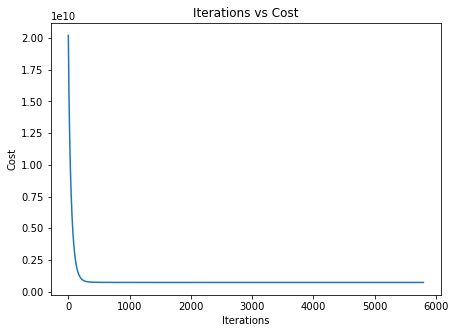

In [40]:
print(f"X_train:{X_train.shape}\ny_train:{y_train.shape}")

seq_regressor = Regressor(normalize=True)
seq_regressor.seq_fit(X_train,y_train)

train_score = r2_score(seq_regressor.predict(X_train),y_train)
test_score = r2_score(seq_regressor.predict(X_test),y_test)

print("Train Score:", train_score)
print("Test Score: ",test_score)
seq_regressor.plot()

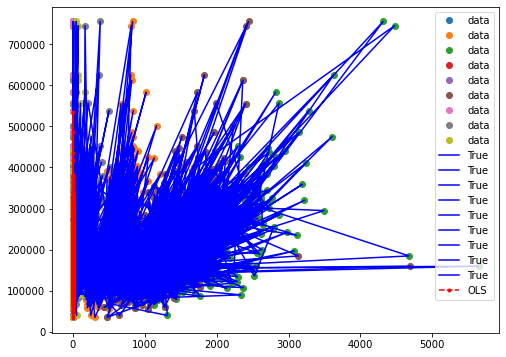

In [52]:
fig, ax = plt.subplots(figsize=(8, 6),dpi=1)

ax.plot(X, y, "o", label="data")
ax.plot(X, y, "b-", label="True")
ax.plot(X_train[:, 0], seq_regressor.predict(X_train), "r--.", label="OLS")
ax.legend(loc="best")